# Problem Set 4: Classificiation with scikit-learn

In this lab you'll be learning about how to use scikit-learn to perform text classificaiton.

Commit and push this Jupyter Notebook (<code>ps4_classification.ipynb</code>) to GitHub by 11:59pm on Monday, September 28.

## 1. The task: Classifying men and women by voice

The included file, `features.csv`, contains the mean pitch, mean intensity, and duration for each of the `.wav` files you worked with for the last problem set.

In this problem set, you will investigate whether these features can help you to automatically determine whether the speaker is a man or a woman, using the machine learning library scikit-learn.

First run the cell below to import the necessary libraries, some of which you might need to install. You'll know that they're missing from your installation of Python if you get errors when you run the code below. If you are admininstering your own installation of Python, use `pip3 install scikit-learn` and `pip3 install numpy`. If you're using Anaconda, install using the Anaconda library installation interface.

Remember that in Jupyter Notebooks, to run the code in a cell, go up to the menu at the top and click `Run` or just hold down the `shift` key and then hit `return`.

Also remember that if things are going crazy, go to `Kernel` then `Restart and clear output`.

In [7]:
# Run this cell without changing anything

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn import metrics
import matplotlib.pyplot as plt

## 2. Reading in the data

I've provided a file I created with parselmouth, using a script that I've included in this repo. 

Your job is to read in the file so that at the end you have (1) a numpy 2-D array of **floats** where each row is a person and each cell in the row is one of the three feature (mean pitch, mean energy, duration); and (2) a numpy 1-D array of **integers** that contains the class labels associated with each person (1 or 0, woman or man). <span style="color: red;">**Don't forget to convert strings to floats or ints as you store the features in the target and data lists.**</span>


In [8]:
# You can just run this cell without changing anything.

# Just to be helpful, I'm reading in the first line of the features.csv file
# so you know that there are headers and what those headers are.

# Open the file. You'll have to update the path to make it work on your machine.
f = open("/Users/15712/Documents/Boston College/Year 4/nlp/final project/features.csv")

# Get the first line of the file, which is the headers indicated which
# information is contained in each column.
featureIDs = f.readline().rstrip().split(",")

# Close the file
f.close()

print("The features are:", featureIDs)

The features are: ['filename', 'singvspeak', 'pitch', 'intensity', 'f1', 'f2', 'vowel_duration', 'jitter', 'shimmer', 'hnr', 'f1_uw', 'f1_ah', 'f1_eh', 'f1_er', 'f1_iy']


In [10]:
### Here's where you write your code to read in the data.
f = open("/Users/15712/Documents/Boston College/Year 4/nlp/final project/features.csv")
features = f.readline()

## Populate two variables: nparray and nptarget.
data = []
target = []

# Class labels will be stored in nptarget (a 1D numpy array).
    # This will be a list of 0's and 1's (integers).
    # You will get these from the last field in the features.csv file.

# Feature data will be stored in npdata (a 2D numpy array).
    # This will be a 2D array. Each row represents a person.
    # Each element in row is a feature value (pitch, energy, duration as floats).
for line in f:
    l = line.rstrip().split(",")
    row = []
    target.append(int(l[1]))
    for i in range(2,len(l)):
        row.append(float(l[i]))
    data.append(row)

## You may read the file in yourself with the basic i/o library and .split(",")
## or you can use the csv library, pandas read_cvs, or numpy genfromtxt. 
## The important thing is that you populate the target and data variables correctly
## and that they end up as numpy arrays and not lists.

npdata = np.array(data)
nptarget = np.array(target)
f.close()




Execute the code below to see how many features and training vectors you have. It should print out

```
You have  462 training instances
You have  3 features
You have  462 class labels
```

If it doesn't print that out, you've done something wrong when reading in the file. You might want to restart the kernel and clear output, depending on how wrong it is.

In [11]:
print("You have ", npdata.shape[0], "training instances")
print("You have ", npdata.shape[1], "features")
print("You have ", nptarget.shape[0], "class labels")

You have  169 training instances
You have  13 features
You have  169 class labels


In the cell below, write code to count and print out the number of men (class id = 0) and the number of women (class id = 1) in the dataset.

In [12]:
sing = 0
speak = 0
for s in nptarget:
    if s == 0:
        sing += 1
    else:
        speak += 1
# print out the number of men 
print(sing)

# print out the number of women
print(speak)


86
83


<b> Q1: Is this a balanced dataset? 

No, I think the numbers should be closer to 50/50. So, 231 men and 231 women.

<b> Q2: What is the majority baseline accuracy?</b>

326/462 or about 70.56%

## 3. Examining the data

Sometimes it helps to visualize the data a bit before you start thinking about classification. The code below, which you do not need to modify, plots the values for women in blue and for men in red for each feature. The x axis is just the index of the row for that person, while the y axis is the feature value.

pitch 301.36866981454074 191.39807508220798
intensity 72.36714300019632 70.23044033716735
f1 697.9124894096092 646.7724856899192
f2 1866.235684467311 1781.9453972568356
vowel_duration 0.3749529577412198 0.11624033199474475
jitter 0.007799156331119677 0.015354524696686637
shimmer 0.0705052246399735 0.10920241802318027
hnr 15.040411307231558 11.284803791838298


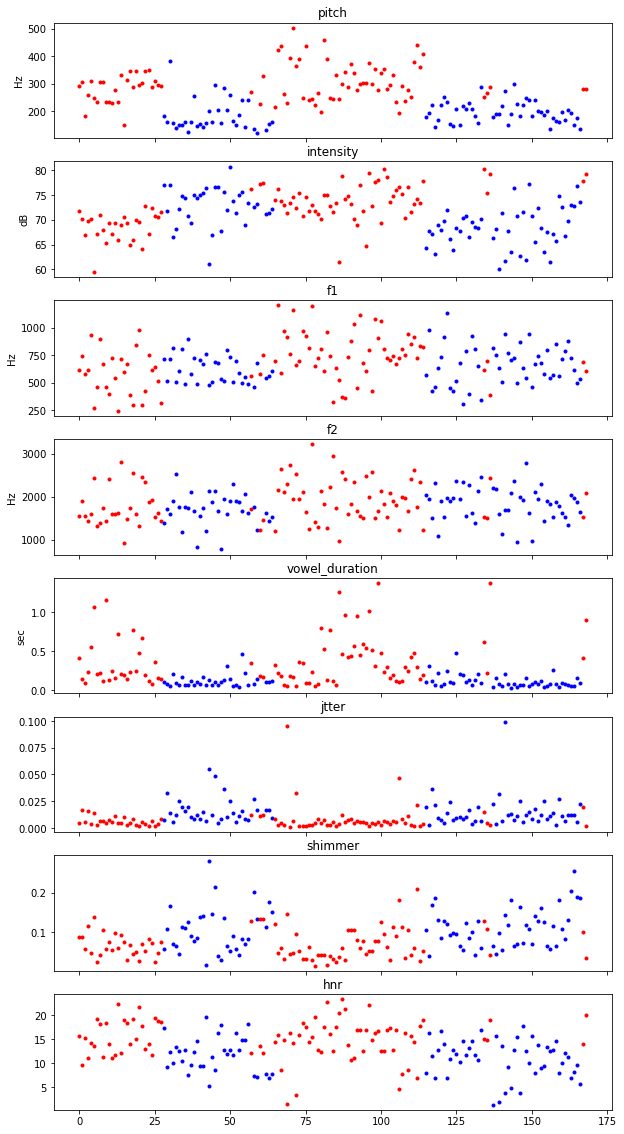

In [26]:
# You can run this cell without modifying the code.

# Create a separate nparray for each feature (pitch, intensity, and duration)
pitch = npdata[:,0:1]
intensity = npdata[:,1:2]
f1 = npdata[:,2:3]
f2 = npdata[:,3:4]
vowel_duration = npdata[:,4:5]
jitter = npdata[:,5:6]
shimmer = npdata[:,6:7]
hnr = npdata[:,7:8]
f1_uw = npdata[:,8:9]
f1_ah = npdata[:,9:10]
f1_eh = npdata[:,10:11]
f1_er = npdata[:,11:12]
f1_iy = npdata[:,12:13]

p0 = []
p1 = []
i0 = []
i1 = []
f10 = []
f11 = []
f20 = []
f21 = []
v0 = []
v1 = []
j0 = []
j1 = []
s0 = []
s1 = []
h0 = []
h1 = []

naive_data =  npdata[:,0:8]
random_data = npdata
#random_data = np.concatenate((npdata[:,0:2],npdata[:,4:13]), axis=1)
#print(random_data)

# Create a plot with three subplots
fig, axs = plt.subplots(8, sharex=True, figsize=(10,20))

for i in range(len(npdata)):
    if nptarget[i] == 0:
        axs[0].plot(i,pitch[i], color="red", marker=".")
        axs[1].plot(i,intensity[i], color="red", marker=".")
        axs[2].plot(i,f1[i], color="red", marker=".")
        axs[3].plot(i,f2[i], color="red", marker=".")
        axs[4].plot(i,vowel_duration[i], color="red", marker=".")
        axs[5].plot(i,jitter[i], color="red", marker=".")
        axs[6].plot(i,shimmer[i], color="red", marker=".")
        axs[7].plot(i,hnr[i], color="red", marker=".")
        #axs[8].plot(i,f1_uw[i], color="red", marker=".")
        #axs[9].plot(i,f1_ah[i], color="red", marker=".")
        #axs[10].plot(i,f1_eh[i], color="red", marker=".")
        #axs[11].plot(i,f1_er[i], color="red", marker=".")
        #axs[12].plot(i,f1_iy[i], color="red", marker=".")
        p0.append(pitch[i])
        i0.append(intensity[i])
        f10.append(f1[i])
        f20.append(f2[i])
        v0.append(vowel_duration[i])
        j0.append(jitter[i])
        s0.append(shimmer[i])
        h0.append(hnr[i])
    else:
        axs[0].plot(i,pitch[i], color="blue", marker=".")
        axs[1].plot(i,intensity[i], color="blue", marker=".")
        axs[2].plot(i,f1[i], color="blue", marker=".")
        axs[3].plot(i,f2[i], color="blue", marker=".")
        axs[4].plot(i,vowel_duration[i], color="blue", marker=".")
        axs[5].plot(i,jitter[i], color="blue", marker=".")
        axs[6].plot(i,shimmer[i], color="blue", marker=".")
        axs[7].plot(i,hnr[i], color="blue", marker=".")
        #axs[8].plot(i,f1_uw[i], color="blue", marker=".")
        #axs[9].plot(i,f1_ah[i], color="blue", marker=".")
        #axs[10].plot(i,f1_eh[i], color="blue", marker=".")
        #axs[11].plot(i,f1_er[i], color="blue", marker=".")
        #axs[12].plot(i,f1_iy[i], color="blue", marker=".")
        p1.append(pitch[i])
        i1.append(intensity[i])
        f11.append(f1[i])
        f21.append(f2[i])
        v1.append(vowel_duration[i])
        j1.append(jitter[i])
        s1.append(shimmer[i])
        h1.append(hnr[i])

print("pitch", np.average(p0), np.average(p1))
print("intensity", np.average(i0), np.average(i1))
print("f1", np.average(f10), np.average(f11))
print("f2", np.average(f20), np.average(f21))
print("vowel_duration", np.average(v0), np.average(v1))
print("jitter", np.average(j0), np.average(j1))
print("shimmer", np.average(s0), np.average(s1))
print("hnr", np.average(h0), np.average(h1))

axs[0].set_title("pitch")
axs[1].set_title("intensity")
axs[2].set_title("f1")
axs[3].set_title("f2")
axs[4].set_title("vowel_duration")
axs[5].set_title("jtter")
axs[6].set_title("shimmer")
axs[7].set_title("hnr")
#axs[8].set_title("f1_uw")
#axs[9].set_title("f1_ah")
#axs[10].set_title("f1_eh")
#axs[11].set_title("f1_er")
#axs[12].set_title("f1_iy")

axs[0].set_ylabel("Hz")
axs[1].set_ylabel("dB")
axs[2].set_ylabel("Hz")
axs[3].set_ylabel("Hz")
axs[4].set_ylabel("sec")

plt.show()


<b> Q3: Based on the pictures above, what feature do you think will do the best job a separating men's voices from women's voices and why?</b>

The pitch because the dot colors are more separated. The blues on average are higher than the reds.

## 4. Classification with cross validation

Okay, let's do some classification! First we are going to just look at each feature one by one, and we'll use a Naive Bayes classifier. 

Remember, we can't train and test of the same data, so we'll be sure to use cross validation. Here's some code that will do this for you and print out some results.

In [43]:
# You can run this cell without modifying the code

# Create a Naive Bayes classifier
gnb = GaussianNB()

# Select some scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# train a model with pitch and 5-fold cross validation
pitch_scores = cross_validate(gnb, pitch, nptarget, cv=5, scoring=scoring_metrics)

# print out the model evaluation metrics
for score_name, score_value in pitch_scores.items():
    print(score_name, score_value, np.mean(score_value))


fit_time [0.00095463 0.         0.00096679 0.00099707 0.        ] 0.0005836963653564453
score_time [0.00302625 0.0020256  0.00199461 0.00199461 0.00288987] 0.002386188507080078
test_accuracy [0.70588235 0.85294118 0.85294118 0.88235294 0.90909091] 0.8406417112299465
test_precision [0.63636364 0.875      0.8        1.         0.84210526] 0.8306937799043063
test_recall [0.875      0.82352941 0.94117647 0.76470588 1.        ] 0.8808823529411764
test_f1 [0.73684211 0.84848485 0.86486486 0.86666667 0.91428571] 0.8462288399130504


Using the last few lines of code above as an example, build and train a model that uses only the **pitch** feature.

Using the last few lines of code above as an example, build and train a model that uses only the **intensity** feature. (Warning: You will get lots of warning messages!)

In [44]:
# train a model with intensity and 5-fold cross validation
intensity_scores = cross_validate(gnb, intensity, nptarget, cv=5, scoring=scoring_metrics)

# print out the model evaluation metrics
for score_name, score_value in intensity_scores.items():
    print(score_name, score_value, np.mean(score_value))


fit_time [0.00199389 0.         0.         0.         0.        ] 0.0003987789154052734
score_time [0.00195599 0.00299144 0.00299168 0.00299168 0.00199509] 0.002585172653198242
test_accuracy [0.17647059 0.44117647 0.88235294 0.67647059 0.75757576] 0.5868092691622104
test_precision [0.22727273 0.375      0.88235294 0.71428571 1.        ] 0.6397822765469824
test_recall [0.3125     0.17647059 0.88235294 0.58823529 0.5       ] 0.4919117647058823
test_f1 [0.26315789 0.24       0.88235294 0.64516129 0.66666667] 0.539467758580512


Using the last few lines of code above as an example, build and train a model that uses **all three features**. (Hint: instead of `pitch`, `duration`, or `intensity` use `npdata`).

In [49]:
# train a model with all three features and 5-fold cross validation
npdata_scores = cross_validate(gnb, naive_data, nptarget, cv=5, scoring=scoring_metrics)

# print out the model evaluation metrics
for score_name, score_value in npdata_scores.items():
    print(score_name, score_value, np.mean(score_value))


fit_time [0.00195098 0.         0.0009973  0.00054574 0.00099754] 0.0008983135223388672
score_time [0.00398827 0.00299191 0.00199485 0.00244617 0.00199437] 0.002683115005493164
test_accuracy [0.73529412 0.85294118 0.76470588 0.94117647 0.87878788] 0.8345811051693405
test_precision [0.65217391 0.875      0.76470588 1.         0.8       ] 0.8183759590792838
test_recall [0.9375     0.82352941 0.76470588 0.88235294 1.        ] 0.8816176470588235
test_f1 [0.76923077 0.84848485 0.76470588 0.9375     0.88888889] 0.8417620777914896


Copying the code above as an example and using the documentation for <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validation.html">cross_validation</a>, change the number of folds in the cross validation to 10 and use all three features.

In [50]:
# train a model with all three features but 10-fold CV
tenfold_scores = cross_validate(gnb, naive_data, nptarget, cv=10, scoring=scoring_metrics)

# print out the evaluation metrics, as above
for score_name, score_value in tenfold_scores.items():
    print(score_name, score_value, np.mean(score_value))



fit_time [0.00199389 0.         0.         0.         0.         0.0009973
 0.00099754 0.00096679 0.00099754 0.00060701] 0.0006560087203979492
score_time [0.00353312 0.00299191 0.00299239 0.00199437 0.00199461 0.00199461
 0.0020256  0.00199604 0.00202727 0.0021584 ] 0.0023708343505859375
test_accuracy [0.76470588 0.76470588 0.88235294 0.82352941 0.82352941 0.76470588
 0.94117647 0.94117647 0.82352941 1.        ] 0.8529411764705882
test_precision [0.7        0.66666667 1.         0.77777778 0.77777778 0.83333333
 1.         1.         0.75       1.        ] 0.8505555555555556
test_recall [0.875      1.         0.75       0.875      0.875      0.625
 0.88888889 0.88888889 1.         1.        ] 0.8777777777777779
test_f1 [0.77777778 0.8        0.85714286 0.82352941 0.82352941 0.71428571
 0.94117647 0.94117647 0.85714286 1.        ] 0.8535760971055089


<b> Q4: What went wrong with the intensity feature? Why did you get all 0's for most of the metrics and all the error messages? What does this mean?</b>

It says that there were zeros because of zero division and zero values. If the precision and recall needed to be divided by 0 that means that there were no true positives, false negatives, or false positives. Because precision and accuracy were 0, the f-measure is also 0.

<b>Q5. In the cell below comment on the accuracy, precision, recall, and F1 measure for each of the three features individually and the features together. How did the results compare to the majority baseline accuracy?

The duration and intensity accuracies are around .7 which makes sense since you can't really differentiate between these two features for men and women and it matches up with the majority baseline accuracy. The precision, recall, and F1 measures are all pretty low for duration. We mentioned in the previous question how the precision, recall, and F1 measures are all 0 for intensity. The pitch accuracy, precision, recall, and F1 measures are all pretty high compared to the other two features which makes sense because you can distinguish between men and women pitches easier. It was mentioned in a previous question how female pitches are on average higher than men's.

<b>Q6. Was there any noticeable difference with 10-fold vs. 5-fold cross validation? </b>

There is no noticeable difference between the two.


Swap out Naive Bayes for *two* other classifiers, such as a <a href="http://scikit-learn.org/stable/modules/tree.html">decision tree</a>, a [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), a [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), an SVM (use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC</a>), or <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">k-NN</a>. **You will need some additional imports, of course!**

Use just 5 folds, and again print out the average accuracy, precision, recall, and F1 over the 5 folds. Refer to the linked documentation above to get the right syntax. 

In [18]:
# Some import statments that might be helpful for you.
# Hint: If you get a warning about LinearSVC, increase the number of iterations.
# Please consult the documentation for details about the necessary arguments.

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



## See the documentation for details.
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']


## Enter your code for cross validation (5 folds) with your first classifier here.
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, random_data, nptarget, cv=7, scoring=scoring_metrics)
for score_name, score_value in rfc_scores.items():
    print(score_name, score_value, np.mean(score_value))

## Enter your code for cross validation (5 folds) with your second classifier here.
mlp = MLPClassifier()
mlp_scores = cross_validate(mlp, naive_data, nptarget, cv=5, scoring=scoring_metrics)
for score_name, score_value in mlp_scores.items():
    print(score_name, score_value, np.mean(score_value))
    
## Enter your code for cross validation (5 folds) with your first classifier here.
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, naive_data, nptarget, cv=5, scoring=scoring_metrics)
for score_name, score_value in rfc_scores.items():
    print(score_name, score_value, np.mean(score_value))



fit_time [0.13663793 0.12164092 0.11350322 0.12166429 0.12067723 0.13260746
 0.16458821] 0.1301884651184082
score_time [0.01097155 0.00998402 0.00999761 0.00997329 0.00997853 0.0162909
 0.01493073] 0.011732373918805803
test_accuracy [0.88       0.83333333 0.79166667 0.875      0.91666667 0.91666667
 0.95833333] 0.8816666666666667
test_precision [0.84615385 0.88888889 0.76923077 0.84615385 1.         0.91666667
 0.92307692] 0.8843101343101345
test_recall [0.91666667 0.72727273 0.83333333 0.91666667 0.83333333 0.91666667
 1.        ] 0.8777056277056278
test_f1 [0.88       0.8        0.8        0.88       0.90909091 0.91666667
 0.96      ] 0.877965367965368


C:\Users\15712\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


fit_time [0.02892065 0.03889537 0.02693033 0.06786251 0.20741343] 0.07400445938110352
score_time [0.00398946 0.00299239 0.00299001 0.00297976 0.00299191] 0.0031887054443359374
test_accuracy [0.52941176 0.70588235 0.38235294 0.79411765 0.87878788] 0.6581105169340463
test_precision [0.5        0.88888889 0.375      0.91666667 0.83333333] 0.7027777777777777
test_recall [1.         0.47058824 0.35294118 0.64705882 0.9375    ] 0.6816176470588236
test_f1 [0.66666667 0.61538462 0.36363636 0.75862069 0.88235294] 0.6573322553038576
fit_time [0.15957308 0.12769246 0.18669081 0.15757108 0.16256571] 0.1588186264038086
score_time [0.01208377 0.01097083 0.01677227 0.01492953 0.01097012] 0.01314530372619629
test_accuracy [0.76470588 0.82352941 0.79411765 0.88235294 0.93939394] 0.8408199643493761
test_precision [0.66666667 0.86666667 0.75       1.         0.88888889] 0.8344444444444445
test_recall [1.         0.76470588 0.88235294 0.76470588 1.        ] 0.8823529411764707
test_f1 [0.8        0.8125   

<b>Q7. In the cell below comment on the precision, recall, and F1 measure (all three!) of these two other classifiers. Are they better or worse, on average, than the naive Bayes classifier you used above?</b>

Both of these other classifiers did better on average in precision and the F1 measure, but the recall for all of them are pretty similar.

## 5. Testing on a held-out set of data

Suppose you want to hold out some of your data for testing, and use the rest for training. Here's how you can do that. Run it too what happens, and REMEMBER HOW THIS IS DONE, since you'll be doing this sort of thing in future labs!

In [81]:
# You can run this cell without modifying the code


# randomly select a subset of your data (size = 10)
testid = [1, 1]
while len(testid) != len(set(testid)):
    testid = np.random.randint(0, npdata.shape[0], 40)

# Get your testing data
print(testid)
testset = naive_data[testid, :]
testtarget = nptarget[testid]
print(testset.shape)

# Get your training data
trainset = np.delete(naive_data, testid, 0)
traintarget = np.delete(nptarget, testid, 0)
print(trainset.shape)

# Build model using fit()
model = GaussianNB()
model.fit(trainset, traintarget)

# Apply model to test set using predict()
expected = testtarget
predicted = model.predict(testset)

# Print a classification report
print(metrics.classification_report(expected, predicted))

# Print a confusion matrix (true positive, false positives, etc.)
print(metrics.confusion_matrix(expected, predicted))


[ 96  43  99 161  30 121 109 118  95 111  57  75  66 120   4 162  63 159
  59  64  25  69 117  67  36 149  72 157  79   2 114 164  18  88  12 167
  90  34 141  14]
(40, 8)
(129, 8)
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.81      0.94      0.87        18

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40

[[18  4]
 [ 1 17]]


<b>Q8: Run the above code several times and observe how the metrics change. Adjust the number of held out examples for testing in line 6. How do these results compare with the results using cross-validation? When the results are quite different, what phenomenon might you be observing?</b>

These results are a lot higher than the cross-validation values. The more held out examples for testing, the lower the results are. This is probably due to the law of large numbers. The more examples that are held out for testing the closer it will be to the actual results which is probably not going to be 100% accuracy.

## 6. Rule-based classification

In class we talked about the difference between classification via learning and classification via rule. Using the most recent train/test split from part 5, develop a rule for distinguishing men from women using the features in the `trainset` data. Apply that rule to the `testset` data to get your `predicted` values. Then evaluate your output using the `metrics.classification_report` function, shown above.

In [71]:
# You can run this cell without modifying the code


# randomly select a subset of your data (size = 10)
testid = [1, 1]
while len(testid) != len(set(testid)):
    testid = np.random.randint(0, npdata.shape[0], 40)

# Get your testing data
print(testid)
testset = random_data[testid, :]
testtarget = nptarget[testid]
print(testset.shape)

# Get your training data
trainset = np.delete(random_data, testid, 0)
traintarget = np.delete(nptarget, testid, 0)
print(trainset.shape)

# Build model using fit()
model = RandomForestClassifier()
model.fit(trainset, traintarget)

# Apply model to test set using predict()
expected = testtarget
predicted = model.predict(testset)

# Print a classification report
print(metrics.classification_report(expected, predicted))

# Print a confusion matrix (true positive, false positives, etc.)
print(metrics.confusion_matrix(expected, predicted))

[134 150 146  31 124  14  13 151  84 147  32  28  51   3 145  87   5 101
  53  92  61 164  74 107  48  22  50 137  24  43  49 135 111  79   1  46
  37 165 112 129]
(40, 13)
(129, 13)
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      0.95      0.93        21

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40

[[17  2]
 [ 1 20]]


<b>Q9: What rule did you use? Did it work better, worse, or the same as your classifiers? (Be sure to compare it to all three classifiers you used.)</b>

In [31]:
# You can run this cell without modifying the code


# randomly select a subset of your data (size = 10)
testid = [1, 1]
while len(testid) != len(set(testid)):
    testid = np.random.randint(0, npdata.shape[0], 40)

# Get your testing data
print(testid)
testset = npdata[testid, :]
testtarget = nptarget[testid]
print(testset.shape)

# Get your training data
trainset = np.delete(npdata, testid, 0)
traintarget = np.delete(nptarget, testid, 0)
print(trainset.shape)

# Build model using fit()
model = MLPClassifier()
model.fit(trainset, traintarget)

# Apply model to test set using predict()
expected = testtarget
predicted = model.predict(testset)

# Print a classification report
print(metrics.classification_report(expected, predicted))

# Print a confusion matrix (true positive, false positives, etc.)
print(metrics.confusion_matrix(expected, predicted))

[150  19  66  12  23  52  91  41  31 136 127 119 152  20 108  21  55  30
  28  33]
(20, 13)
(149, 13)
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         9
           1       0.00      0.00      0.00        11

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20

[[ 9  0]
 [11  0]]


C:\Users\15712\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Verifying and submitting your work

You will be submitting this Jupyter Notebook to your GitHub repo for this problem set. 

<span style="color: red;">1. Make sure you've answered every <b>Q</b> question.</span>

<span style="color: blue;">2. Make sure you've written code wherever required.</span> 

<span style="color: green;">3. Go up to the Kernel menu and select Restart and Run All. This will run all of the code you've written. Make sure there are no errors.</span>

<span style="color: purple;">4. Commit and push the Jupyter Notebook (<code>ps4_classification.ipynb</code>) to GitHub by 11:59pm on Monday, September 28.</span>
